<a href="https://colab.research.google.com/github/jemmychen365/gpt-ai-assistant/blob/main/20240517.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機器學習平台Teachable Machine

https://teachablemachine.withgoogle.com/


## 口罩辨識專題

### 測試Teachable Machine結果

In [ ]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("keras_model.h5", compile=False)

# Load the labels
class_names = open("labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("/content/132.jpg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)


1/1 [==============================] - 1s 955ms/step
Class: 有戴口罩
Confidence Score: 0.9999999


### 加入Webcam

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


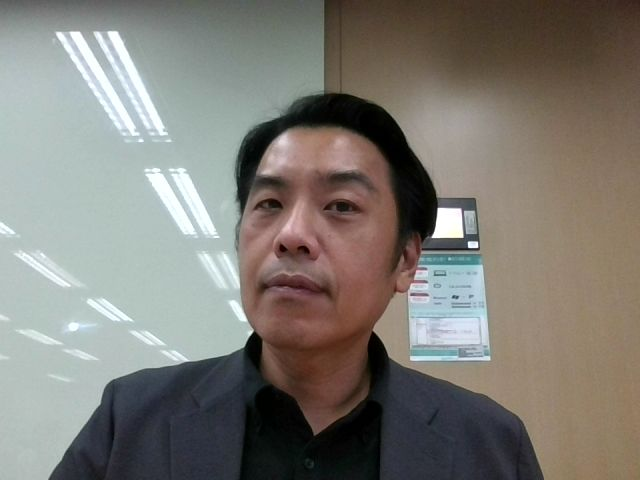

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

def checkmask(photo):
    # Disable scientific notation for clarity
    np.set_printoptions(suppress=True)

    # Load the model
    model = load_model("keras_model.h5", compile=False)

    # Load the labels
    class_names = open("labels.txt", "r").readlines()

    # Create the array of the right shape to feed into the keras model
    # The 'length' or number of images you can put into the array is
    # determined by the first position in the shape tuple, in this case 1
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

    # Replace this with the path to your image
    image = Image.open(photo).convert("RGB")

    # resizing the image to be at least 224x224 and then cropping from the center
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

    # turn the image into a numpy array
    image_array = np.asarray(image)

    # Normalize the image
    normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

    # Load the image into the array
    data[0] = normalized_image_array

    # Predicts the model
    prediction = model.predict(data)
    index = np.argmax(prediction)
    class_name = class_names[index]
    confidence_score = prediction[0][index]

    # Print prediction and confidence score
    # print("Class:", class_name[2:], end="")
    # print("Confidence Score:", confidence_score)
    return class_name[2:]

In [ ]:
print(checkmask('/content/132.jpg'))

1/1 [==============================] - 2s 2s/step
有戴口罩



### 使用WebCam進行口罩辨識

In [ ]:
# 用攝影機拍照，檢查口罩
# filename = take_photo()
# print(checkmask(filename))
print(checkmask(take_photo()))

<IPython.core.display.Javascript object>

1/1 [==============================] - 1s 1s/step
沒有戴口罩



# YOLO 物件辨識演算法

本課程將介紹Darknet為框架建立的YOLOv4演算法，將會在你的雲端硬碟中完成環境建立，以利後續使用，最後會使用照片或即時影像進行分析

## 使用GPU的執行階段

In [ ]:
# 檢查環境
import sys
print('python version=', sys.version)
import cv2
print('cv2 version=', cv2.__version__)
import tensorflow as tf
print('tf version=', tf.__version__)
!nvidia-smi

python version= 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
cv2 version= 4.8.0
tf version= 2.15.0
Fri May 17 07:35:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |          

* 步驟0：請建立副本存到自己的雲端硬碟

* 步驟1：連結到自己的雲端硬碟，後續可以直接啟用辨識

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

* 步驟2：將路徑移動到自己的雲端硬碟

In [ ]:
%cd drive/MyDrive/Colab\ Notebooks
%ls

In [ ]:
%pwd

'/content/drive/MyDrive/Colab Notebooks'

* 步驟3：查看系統顯示卡規格(NVIDIA AI加速)

In [ ]:
!nvidia-smi -q

## Darknet神經網路建立
我們使用的Darknet為Alex版本的Darknet網路框架

* 步驟4：將計畫檔複製到我們的雲端硬碟

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15851, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15851 (delta 5), reused 13 (delta 4), pack-reused 15833
Receiving objects: 100% (15851/15851), 14.42 MiB | 14.21 MiB/s, done.
Resolving deltas: 100% (10671/10671), done.
Updating files: 100% (2056/2056), done.


* 步驟5：修改編譯設定，主要是因為Colab雲端電腦有提供高效能GPU，所以我們使用Nvidia所提供的Cuda平行運算架構來建立Darknet。

In [ ]:
# change makefile to have GPU, OPENCV and LIBSO enabled

!sed -i 's/OPENCV=0/OPENCV=1/' darknet/Makefile
!sed -i 's/GPU=0/GPU=1/' darknet/Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' darknet/Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' darknet/Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' darknet/Makefile

* 步驟6：編譯Darknet（需要1-3分鐘左右）

In [ ]:
# make darknet (builds darknet so that you can then use the darknet.py file and have its dependencies)
%cd darknet
!make

/content/drive/MyDrive/Colab Notebooks/darknet
mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, in

* 步驟7：下載YOLOv4 Pre-Trained類神經網路模型的權重檔，本模型能辨識日常生活中的80個物件，相關資料都在cfg/coco.names中

    * YOLOv4：全模型，有162層CNN所建立的類神經網路，正確率較高，但效能較低

    * YOLOv4-tiny：精簡模型，只有38層，效率高，但辨識率普通

In [ ]:
#YOLOv4
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.weights -q
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights -q
#YOLOv7
# !wget https://github.com/AlexeyAB/darknet/releases/download/yolov4/yolov7.weights
# !wget https://github.com/AlexeyAB/darknet/releases/download/yolov4/yolov7-tiny.weights

## 載入Darknet


* 步驟8：載入影像擷取即顯示用的相關套件

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import urllib.request
import time
import matplotlib.pyplot as plt
%matplotlib inline

* 步驟9：選擇使用的YOLO版本，需有三個設定

    1. cfg:網路設定檔
    2. weights:類神經網路權重檔
    3. data:能辨識的物件名稱

In [ ]:
#選擇你要用的網路型態
YOLO_cfg='cfg/yolov4.cfg' # cfg/yolov4-tiny.cfg
YOLO_weight='yolov4.weights' # yolov4.weights
YOLO_label='cfg/coco.data'

* 步驟10：載入神經網路

    建立darknet_dect副程式

In [ ]:
from darknet import *
network, class_names, class_colors = load_network(YOLO_cfg, YOLO_label, YOLO_weight)
width = network_width(network)
height = network_height(network)

# darknet helper function to run detection on image
def darknet_dect(img, width, height):
  darknet_image = make_image(width, height, 3)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resized = cv2.resize(img_rgb, (width, height),
                              interpolation=cv2.INTER_LINEAR)

  # get image ratios to convert bounding boxes to proper size
  img_height, img_width, _ = img.shape
  width_ratio = img_width/width
  height_ratio = img_height/height

  # run model on darknet style image to get detections
  copy_image_from_bytes(darknet_image, img_resized.tobytes())
  detections = detect_image(network, class_names, darknet_image)
  free_image(darknet_image)
  return detections, width_ratio, height_ratio

## 一般測試
* 步驟11：先使用內建的照片進行測試，內建的照片都放在data中，可以用雲端硬碟來事先查看

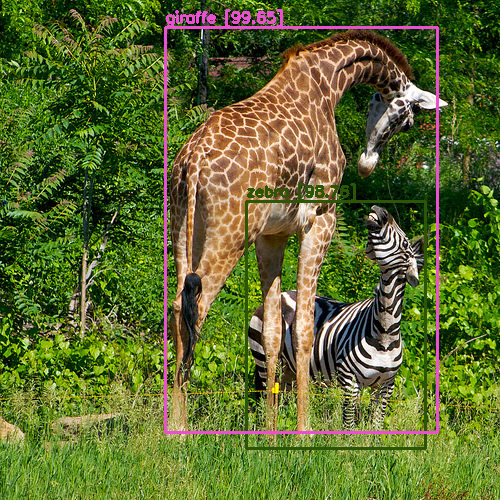

In [ ]:
image = cv2.imread("data/giraffe.jpg")
detections, width_ratio, height_ratio = darknet_dect(image, width, height)
# 物件名稱,信任程度,位置
for label, confidence, bbox in detections:
  left, top, right, bottom = bbox2points(bbox)
  #比例
  left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
  #像素座標
  cv2.rectangle(image, (left, top), (right, bottom), class_colors[label], 2)
  #繪出方形(bbox)
  #照片,文字內容,位置,字形,大小,顏色,寬度
  cv2.putText(image, "{} [{:.2f}]".format(label, float(confidence)),(left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,class_colors[label], 2)

cv2_imshow(image)

* 步驟12：讀取網路的照片

    * 從網路上，搜尋一張照片，例如「路口」，https://ibw.bwnet.com.tw/AC_Gallery/2023/06/fd23566a-9eee-9923-5ef6-31e2ad5f22e3.jpg  
    複製他的網址後，先查看原始圖片，然後拿來偵測裡面出現的物件
    
* 其他圖片
    - https://www.upmedia.mg/upload/article/20200904161256111093.JPG

    - https://live.staticflickr.com/65535/49754726073_71efeee5dc_b.jpg


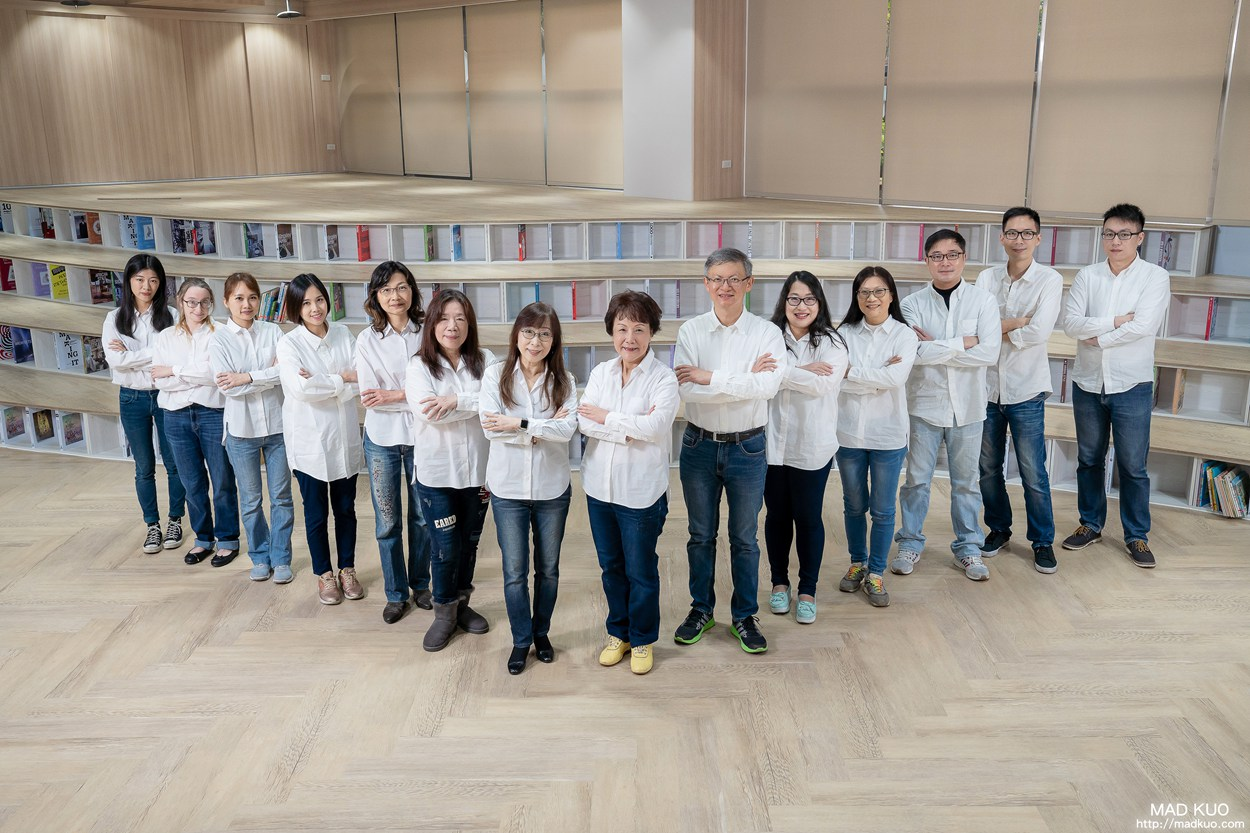

In [ ]:
import requests
url = "https://i0.wp.com/farm66.static.flickr.com/65535/49690278476_8d1fb45b54_o.jpg?quality=100"
filename = "image.jpg"

r = requests.get(url)
with open(filename, 'wb') as f:
    f.write(r.content)

# urllib.request.urlretrieve(url, filename)
img_test = cv2.imread(filename)

cv2_imshow(img_test) #顯示圖片

* 步驟13：使用Darknet進行網路照片物件偵測

{'book': 2, 'person': 14}


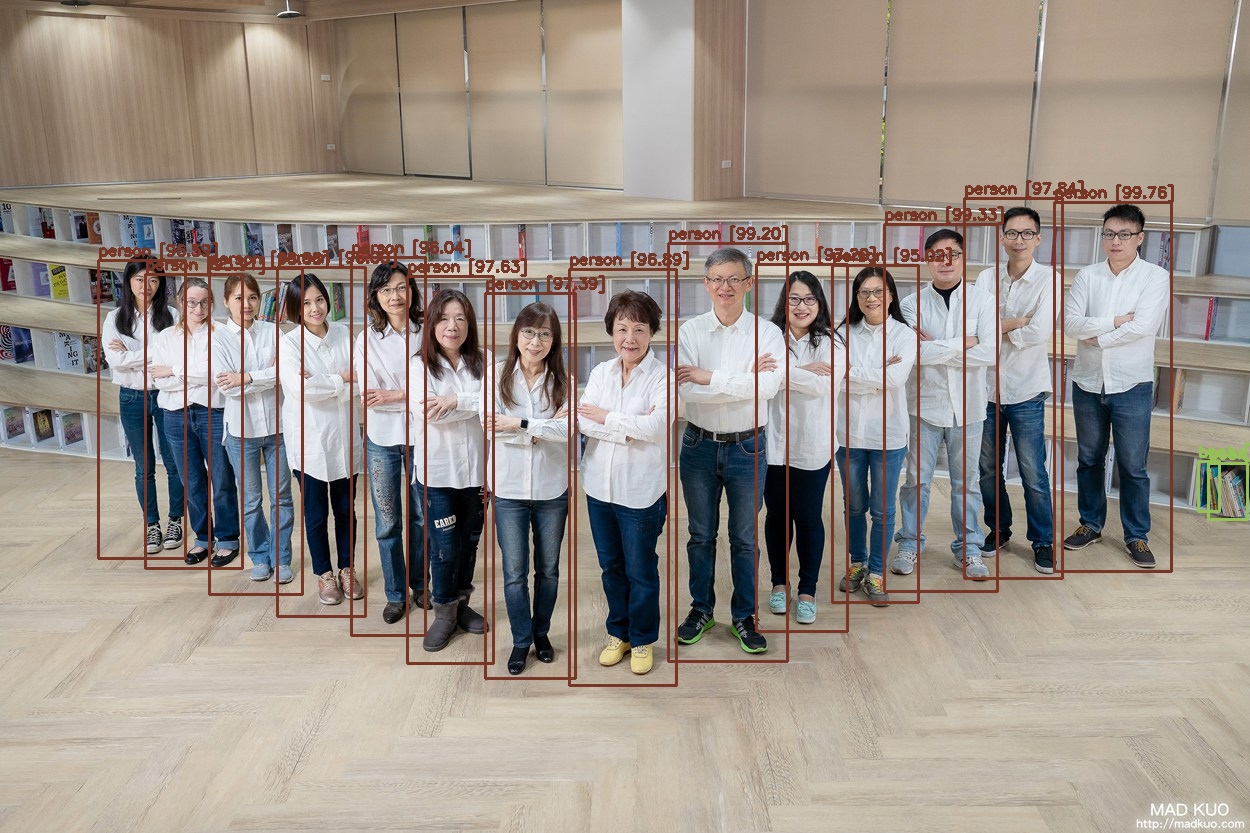

In [ ]:
objCount={}
detections, width_ratio, height_ratio = darknet_dect(img_test, width, height)
for label, confidence, bbox in detections:
  left, top, right, bottom = bbox2points(bbox)
  #比例
  left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
  #像素座標
  cv2.rectangle(img_test, (left, top), (right, bottom), class_colors[label], 2)
  #繪出方形(bbox)
  #照片,文字內容,位置,字形,大小,顏色,寬度
  cv2.putText(img_test, "{} [{:.2f}]".format(label, float(confidence)),(left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,class_colors[label], 2)
  #利用python字典將所有的detections的label列舉出現次數
  if label in objCount.keys():
    objCount[label] = objCount[label] + 1
  else:
    objCount[label] = 1
print(objCount)
cv2_imshow(img_test)

In [ ]:
image = cv2.imread("data/person.jpg")
detections, width_ratio, height_ratio = darknet_dect(image, width, height)

for label, confidence, bbox in detections:
  left, top, right, bottom = bbox2points(bbox)
  #比例
  left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
  #像素座標
  cv2.rectangle(image, (left, top), (right, bottom), class_colors[label], 2)
  #繪出方形(bbox)
  #照片,文字內容,位置,字形,大小,顏色,寬度
  cv2.putText(image, "{} [{:.2f}]".format(label, float(confidence)),(left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,class_colors[label], 2)

cv2_imshow(image)

## Webcam照片偵測

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)

  # call our darknet helper on webcam image
  detections, width_ratio, height_ratio = darknet_dect(img, width, height)

  # loop through detections and draw them on webcam image
  for label, confidence, bbox in detections:
    left, top, right, bottom = bbox2points(bbox)
    left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
    cv2.rectangle(img, (left, top), (right, bottom), class_colors[label], 2)
    cv2.putText(img, "{} [{:.2f}]".format(label, float(confidence)),
                      (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                      class_colors[label], 2)
  # save image
  cv2.imwrite(filename, img)

  return filename

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## Webcam影片偵測

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # call our darknet helper on video frame
    detections, width_ratio, height_ratio = darknet_dect(frame, width, height)

    # loop through detections and draw them on transparent overlay image
    for label, confidence, bbox in detections:
      left, top, right, bottom = bbox2points(bbox)
      left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
      bbox_array = cv2.rectangle(bbox_array, (left, top), (right, bottom), class_colors[label], 2)
      bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format(label, float(confidence)),
                        (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        class_colors[label], 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # 將資料轉換成JS格式
    bbox_bytes = bbox_to_bytes(bbox_array)
    # 更新畫面
    bbox = bbox_bytes